<a href="https://colab.research.google.com/github/cwp-kr/ML-class/blob/main/9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9주차 과제/train.csv') #xlsx 파일로는 너무 오래걸려서 불가능
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9주차 과제/test.csv')

In [5]:
train_data.shape

(42000, 785)

In [6]:
test_data.shape

(28000, 784)

In [7]:
train, val = train_test_split(train_data, test_size=0.2, random_state=42, shuffle=True)

In [8]:
train.shape

(33600, 785)

In [9]:
val.shape

(8400, 785)

In [10]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
x_val = val.iloc[:, 1:]
y_val = val.iloc[:, 0]

In [11]:
x_train.shape

(33600, 784)

In [12]:
y_train.shape

(33600,)

In [13]:
x_val.shape

(8400, 784)

In [14]:
y_val.shape

(8400,)

In [15]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train).ravel()
x_val = np.asarray(x_val)
y_val = np.asarray(y_val).ravel()

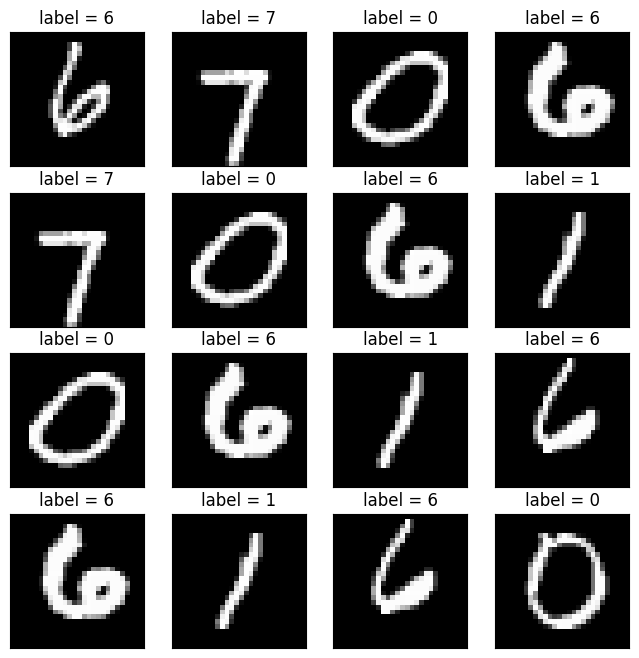

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
      ax[i, j].imshow(x_train[i*4+j*4].reshape(28, 28), cmap='gray')
      ax[i, j].set_title('label = %s' % (y_train[i*4 + j*4]))
      ax[i, j].set_xticks([])
      ax[i, j].set_yticks([])

In [17]:
clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                         intercept_scaling=1, l1_ratio=None, max_iter=100,
                         multi_class='multinomial', n_jobs=None, penalty='l2',
                         random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                         warm_start=False)

In [18]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

In [19]:
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.918


correctly predicted images:


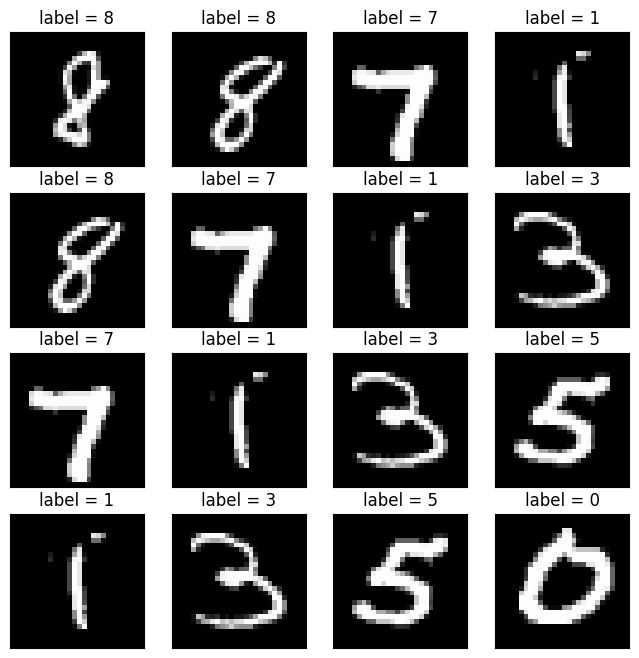

In [20]:
print("correctly predicted images:")
x_val_correct = x_val[y_val == y_val_pred,:]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
      ax[i, j].imshow(x_val_correct[i*4+j*4].reshape(28, 28), cmap='gray')
      ax[i, j].set_title('label = %s' % (y_val_pred_correct[i*4 + j*4]))
      ax[i, j].set_xticks([])
      ax[i, j].set_yticks([])

incorrectly predicted images:


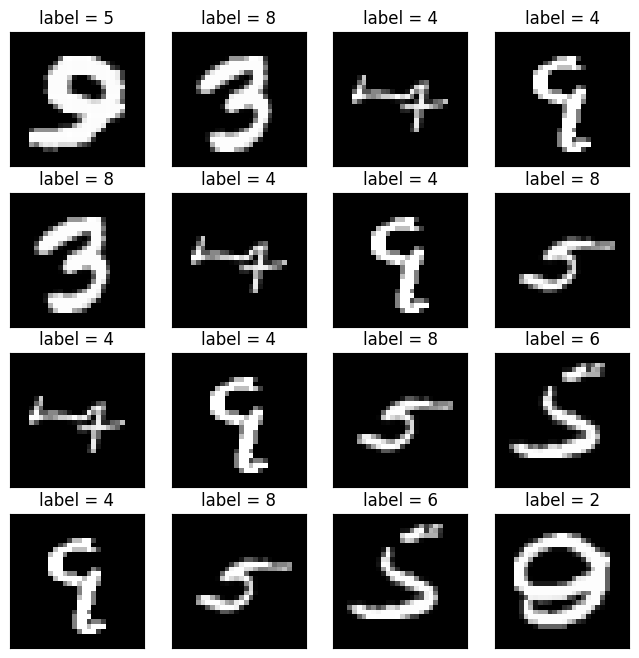

In [21]:
print("incorrectly predicted images:")
x_val_incorrect = x_val[y_val != y_val_pred,:]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
      ax[i, j].imshow(x_val_incorrect[i*4+j*4].reshape(28, 28), cmap='gray')
      ax[i, j].set_title('label = %s' % (y_val_pred_incorrect[i*4 + j*4]))
      ax[i, j].set_xticks([])
      ax[i, j].set_yticks([])

In [22]:
x_test = test_data.values
preds = clf.predict(test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [24]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9주차 과제/sample_submission.csv')

In [25]:
sample_submission['Label'] = preds
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/9주차 과제/sample_submission.csv', index=False)